# 🦀 **<span style="color: DarkGreen; font-family:Times New Roman;">Crab Age</span>**

---


* * *
# 📖 <span style="color: DarkGreen; font-family:Times New Roman;">INTRODUCTION</span> <a name="introduction"></a>
---


* * *
# 🛠️ <span style="color: DarkGreen; font-family:Times New Roman;">Import important libraries, Read the data</span> <a name="iaiil"></a>
---


In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
train = pd.read_csv("train.csv",index_col = "id")
test = pd.read_csv("test.csv",index_col = "id")

In [59]:
# Decide to run the model_selection part or not
model_selection = False

# Random State
RS = 13

# Folds Number
folds = 5


* * *
# 👁️ <span style="color: DarkGreen; font-family:Times New Roman;">Overview</span> <a name="overview"></a>
---


In [60]:
train.shape

(74051, 9)

In [61]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [62]:
train.Sex.unique()

array(['I', 'M', 'F'], dtype=object)

In [63]:
train.tail()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8
74050,I,0.9125,0.6750,0.2000,5.386405,2.055339,1.034757,1.700970,6


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [65]:
train.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [66]:
train.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [67]:
train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True)

* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">EDA</span> <a name="eda"></a>
---


* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Univariate Analysis</span> <a name="univariate-analysis"></a>
---


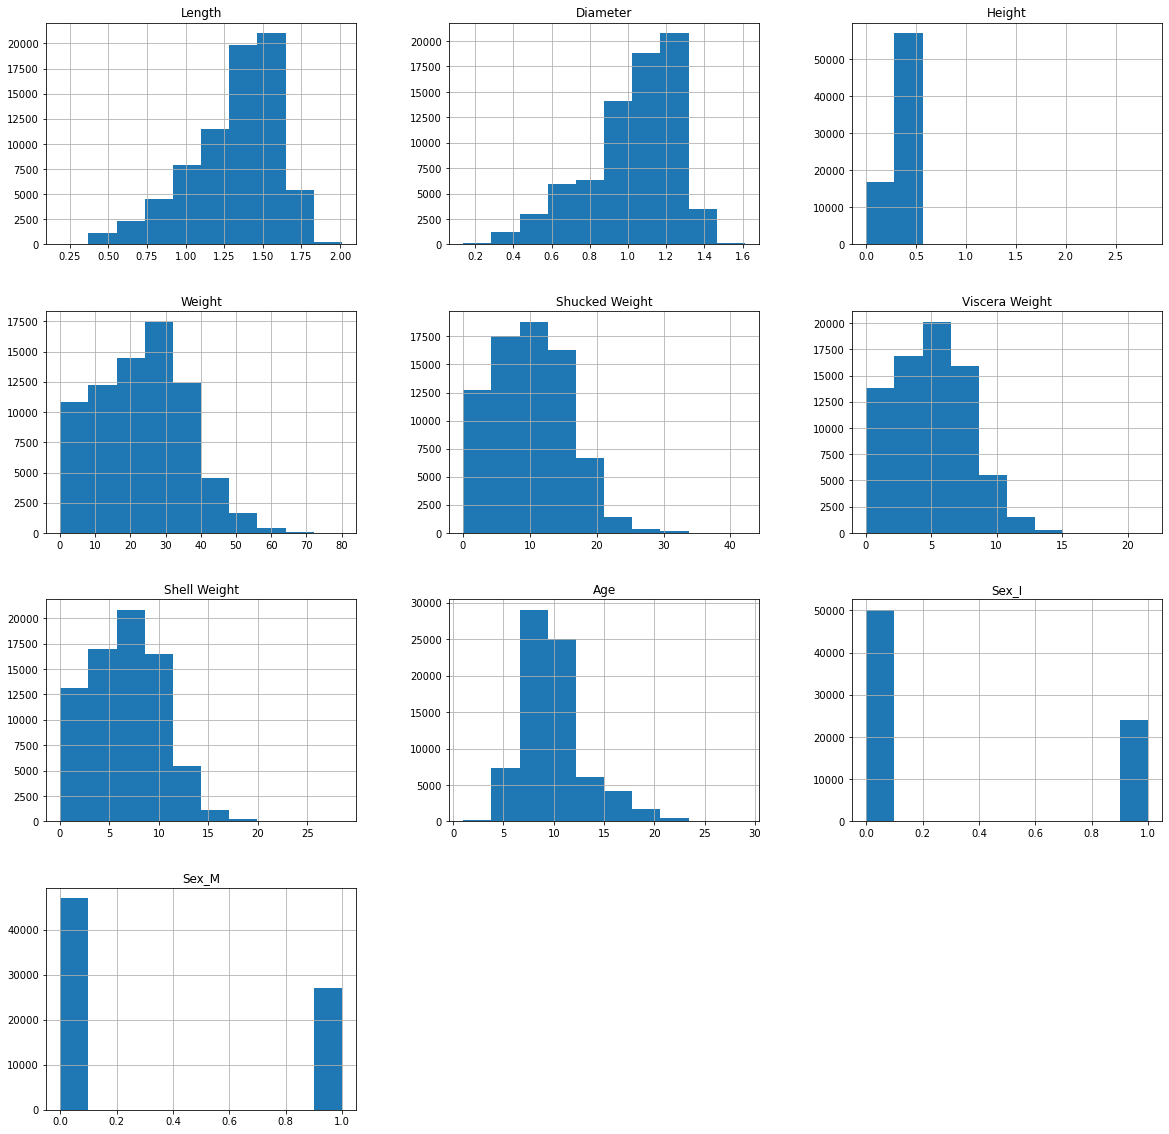

In [68]:
train.hist(figsize = (20,20))
plt.show()

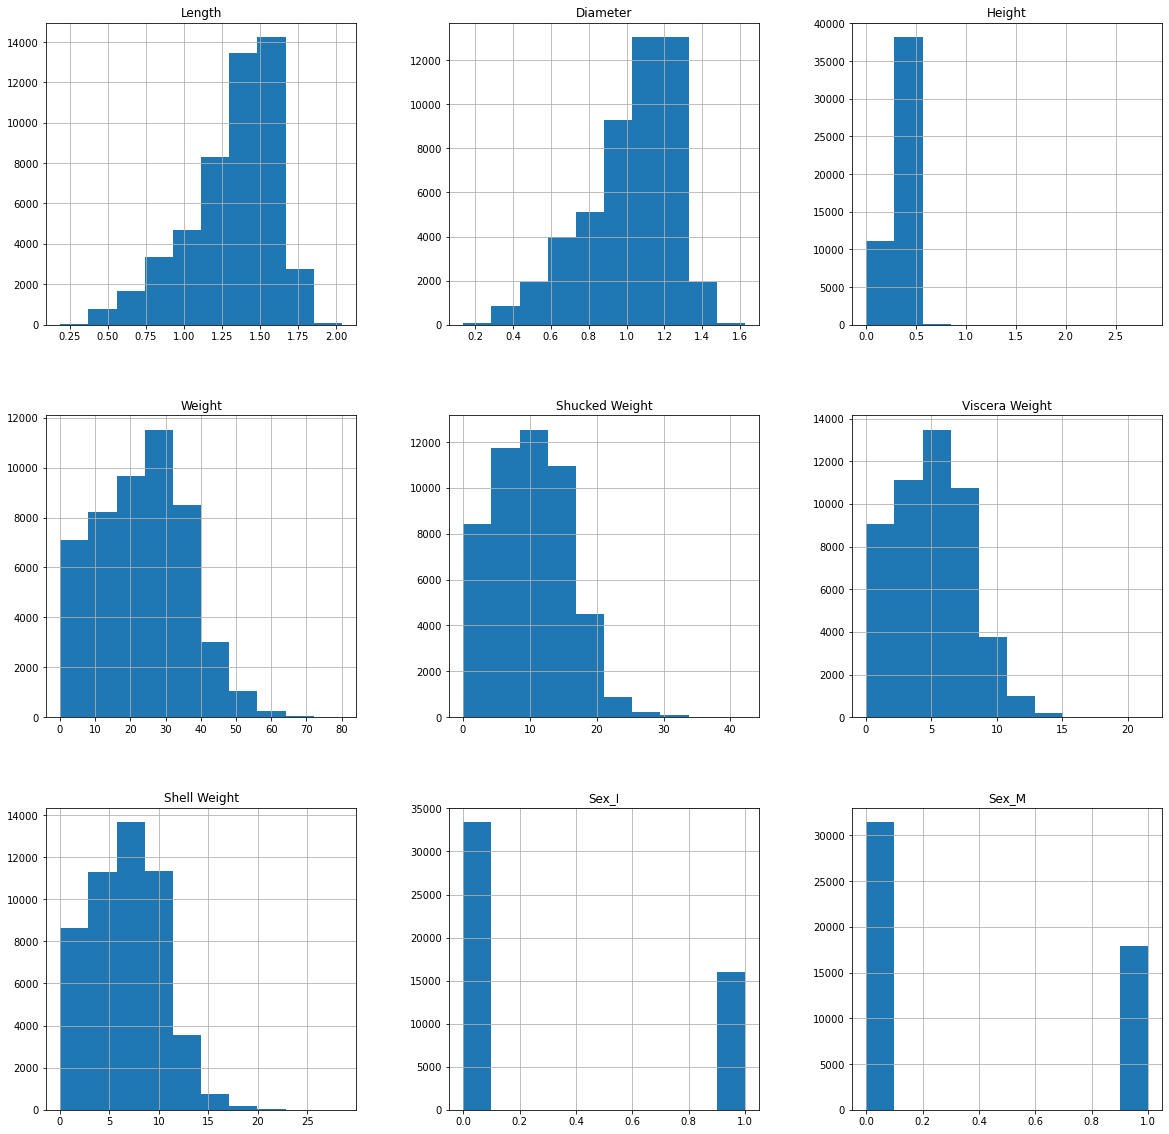

In [69]:
test.hist(figsize = (20,20))
plt.show()

* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Correlation Analysis</span> <a name="corr"></a>
---


In [70]:
train.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
Length,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843,-0.651507,0.301459
Diameter,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256,-0.657348,0.303113
Height,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067,-0.636298,0.289869
Weight,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195,-0.641438,0.290705
Shucked Weight,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320,-0.611473,0.285511
Viscera Weight,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808,-0.636140,0.285610
Shell Weight,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473,-0.637923,0.284606
Age,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000,-0.515909,0.221978
Sex_I,-0.651507,-0.657348,-0.636298,-0.641438,-0.611473,-0.636140,-0.637923,-0.515909,1.000000,-0.525150
Sex_M,0.301459,0.303113,0.289869,0.290705,0.285511,0.285610,0.284606,0.221978,-0.525150,1.000000


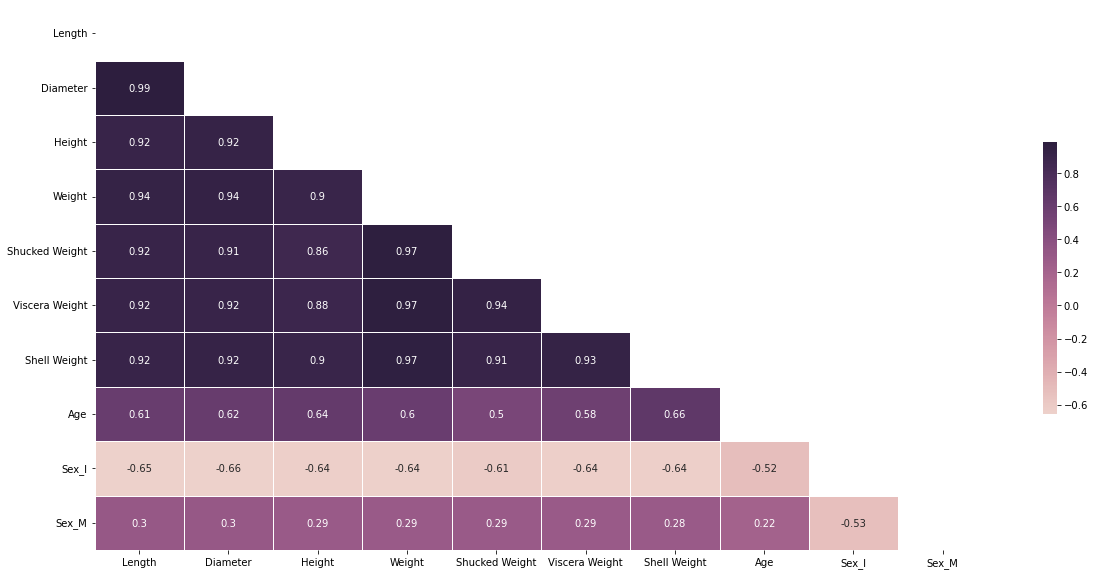

In [71]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(train.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(train.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

In [72]:
train.corr()["Age"].sort_values(ascending = False)

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
Sex_M             0.221978
Sex_I            -0.515909
Name: Age, dtype: float64

In [73]:
test.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
Length,1.000000,0.989528,0.914433,0.936135,0.915109,0.917540,0.917255,-0.649979,0.298103
Diameter,0.989528,1.000000,0.917109,0.938017,0.913561,0.918327,0.922974,-0.655250,0.299794
Height,0.914433,0.917109,1.000000,0.895822,0.858293,0.878135,0.897574,-0.633822,0.282720
Weight,0.936135,0.938017,0.895822,1.000000,0.971132,0.970527,0.964761,-0.640386,0.289174
Shucked Weight,0.915109,0.913561,0.858293,0.971132,1.000000,0.942841,0.909917,-0.610045,0.282319
Viscera Weight,0.917540,0.918327,0.878135,0.970527,0.942841,1.000000,0.933219,-0.635093,0.282587
Shell Weight,0.917255,0.922974,0.897574,0.964761,0.909917,0.933219,1.000000,-0.637403,0.283425
Sex_I,-0.649979,-0.655250,-0.633822,-0.640386,-0.610045,-0.635093,-0.637403,1.000000,-0.521893
Sex_M,0.298103,0.299794,0.282720,0.289174,0.282319,0.282587,0.283425,-0.521893,1.000000


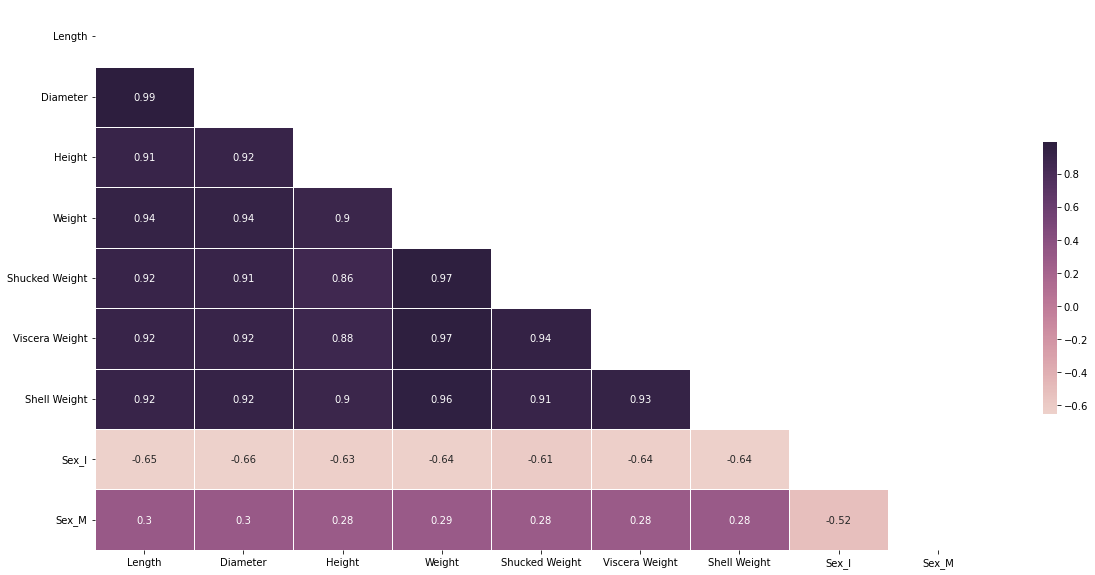

In [74]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(test.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(test.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

* * *
# 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Feature Interactions</span> <a name="feature-interactions"></a>
---


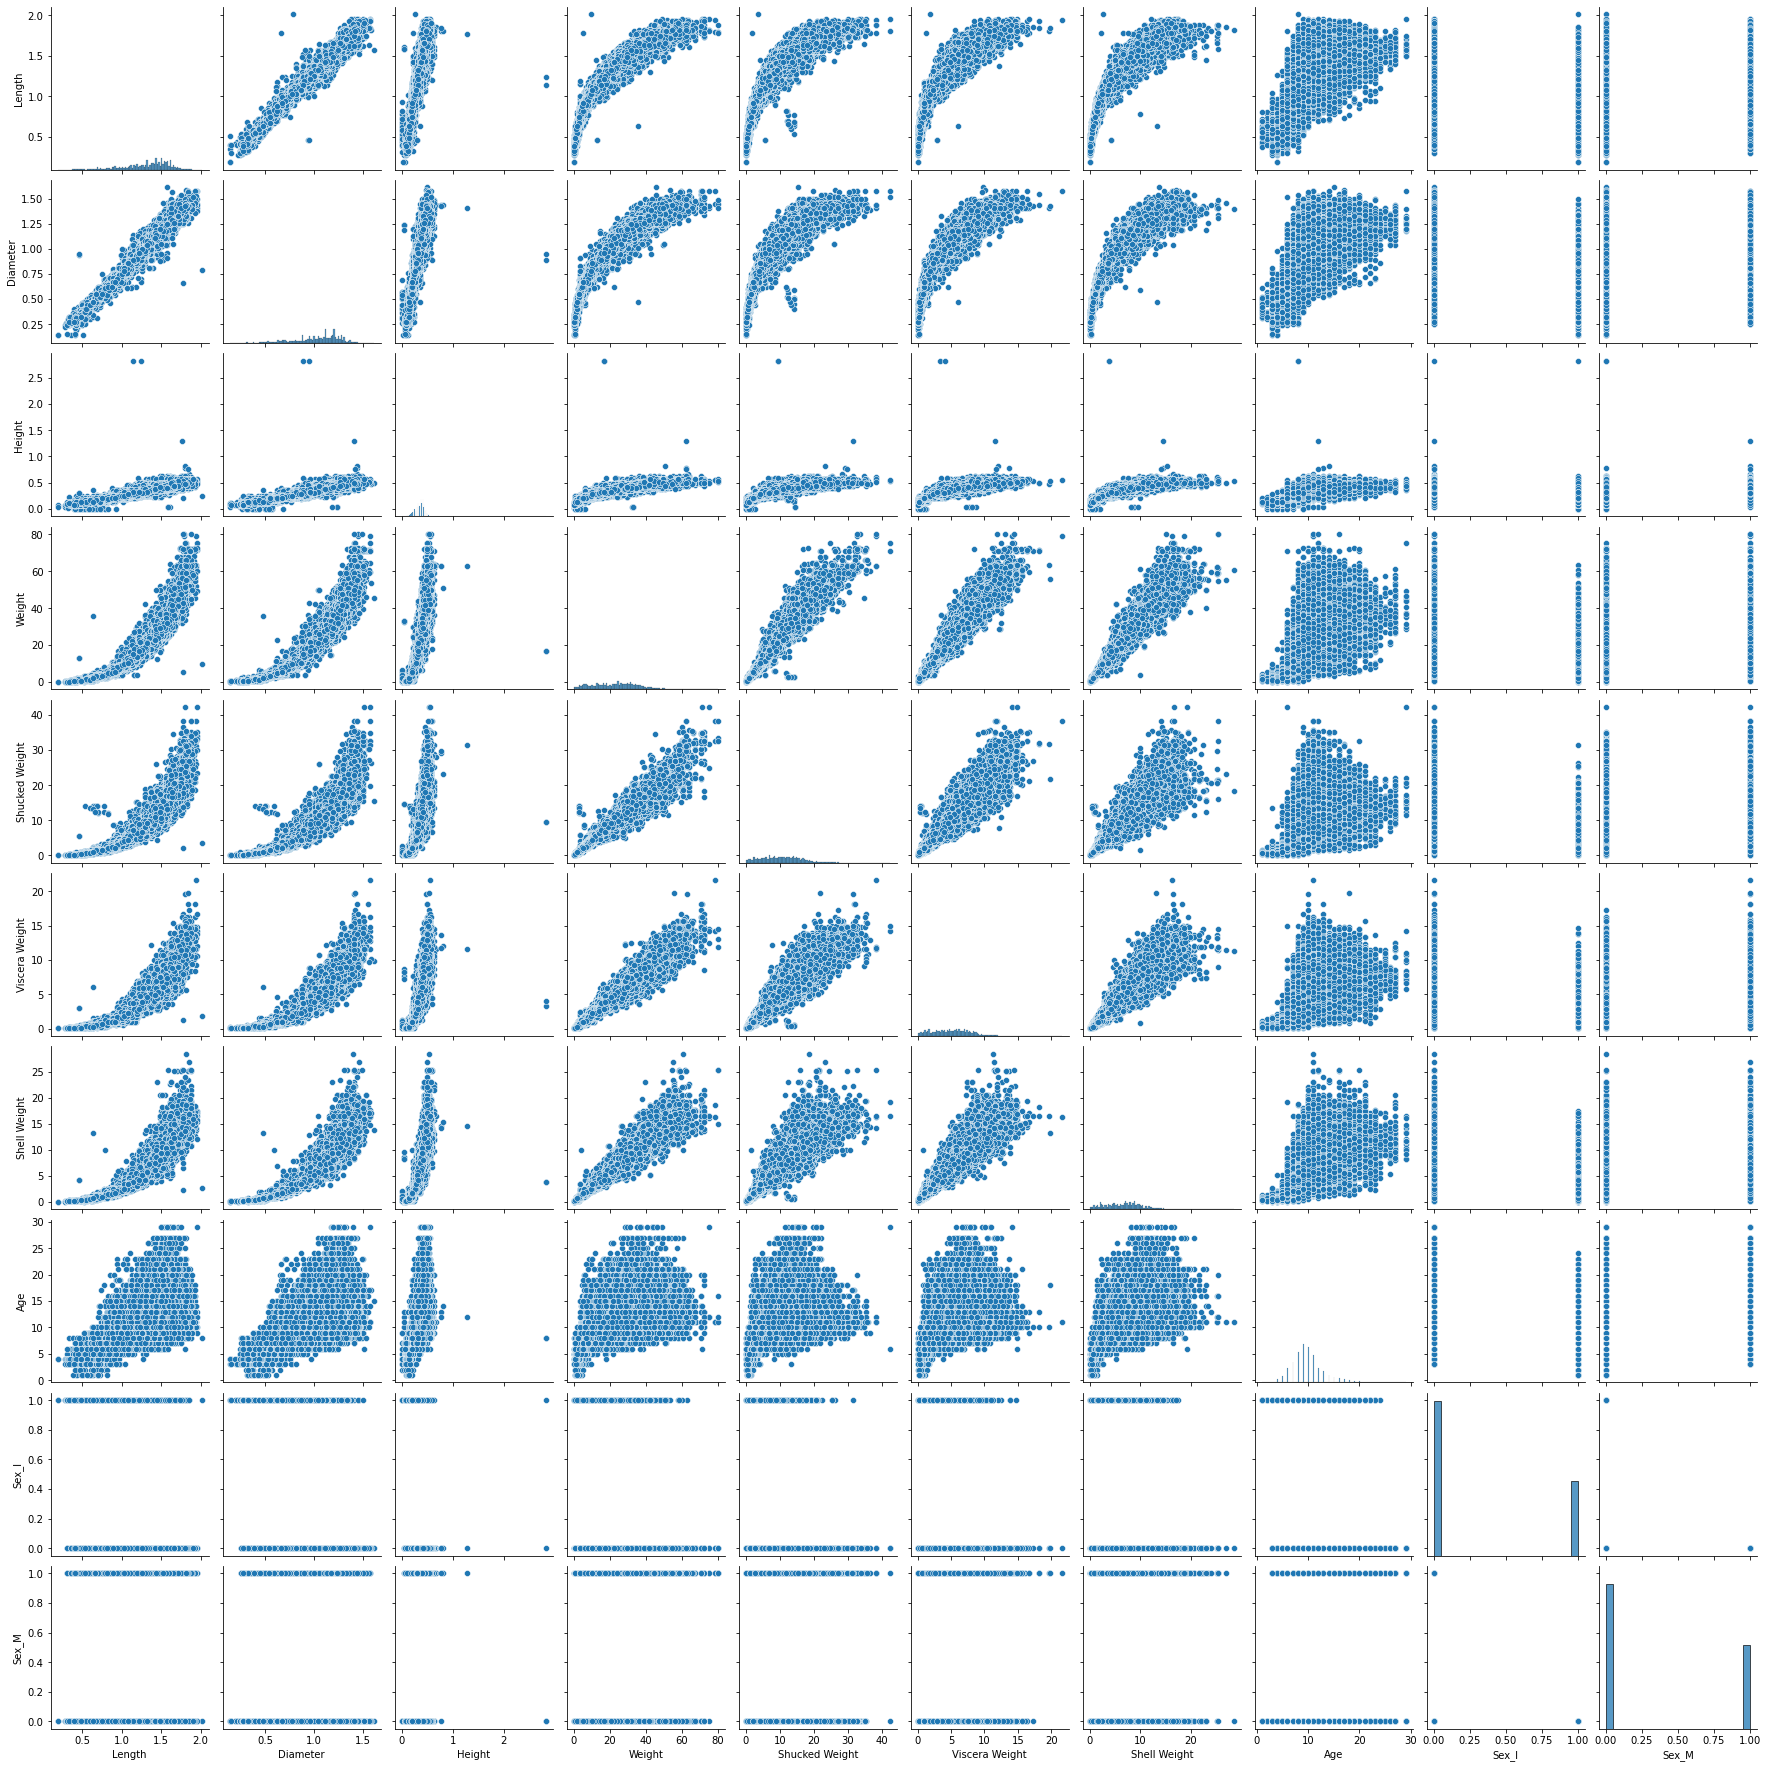

In [75]:
sns.pairplot(train)
plt.show()

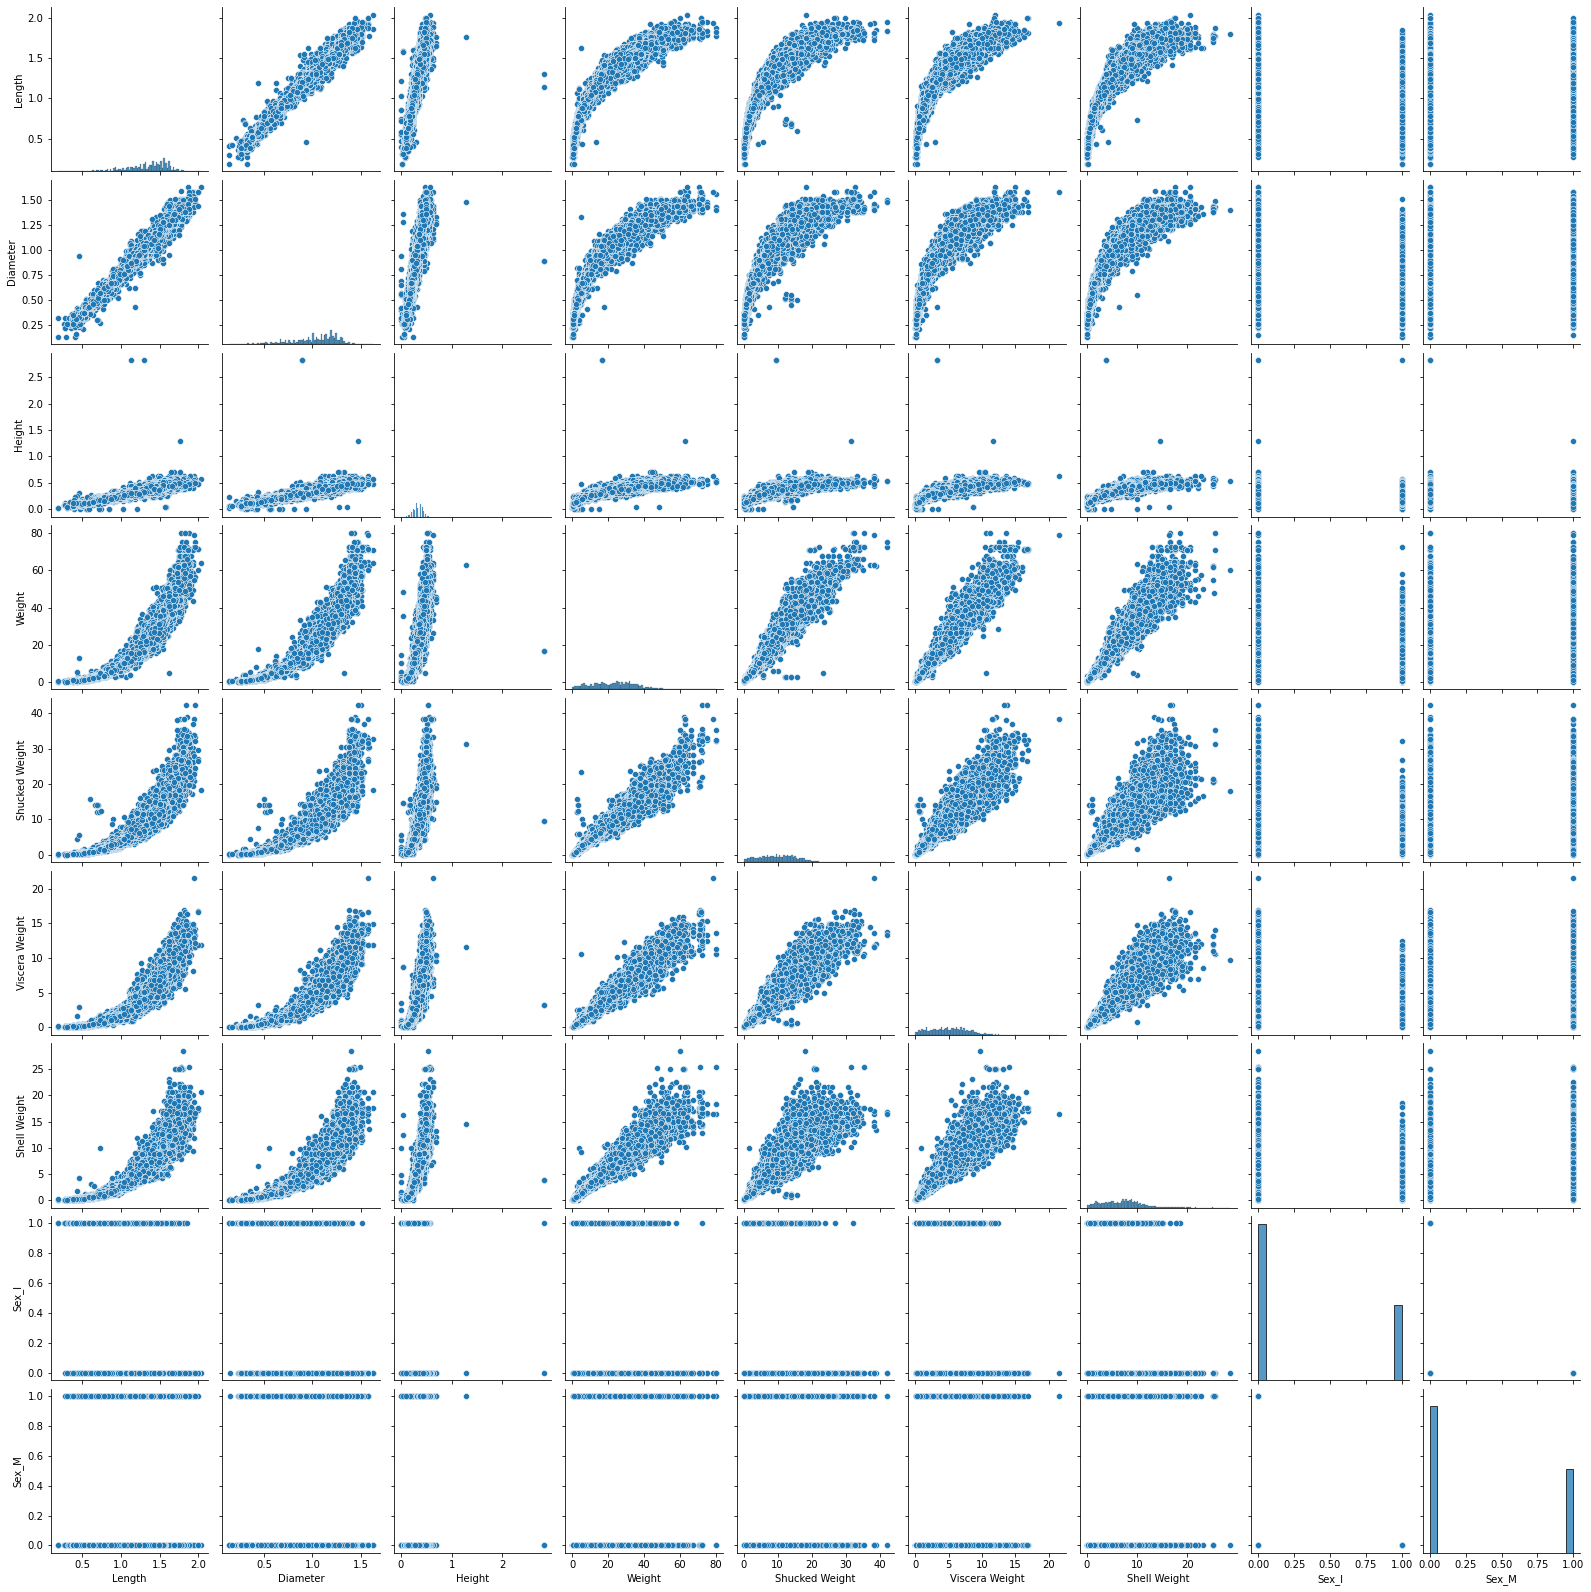

In [76]:
sns.pairplot(test)
plt.show()

* * *
# ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Feature Engineering</span> <a name="feature-engineering"></a>
---


* * *
# ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Dimensionality Reduction</span> <a name="dimensionality-reduction"></a>
---


* * *
# ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Standardization</span> <a name="standardization"></a>
---


In [77]:
def scaling(feature):
    global X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit
    scaler.fit(X_train[feature].to_numpy().reshape(-1,1))
    X_train[feature] = scaler.transform(X_train[feature].to_numpy().reshape(-1,1))
    X_test[feature] = scaler.transform(X_test[feature].to_numpy().reshape(-1,1))

In [78]:
scale_needed_features = [ "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]

* * *
# 🧑‍🔬 <span style="color: DarkGreen; font-family:Times New Roman;">Model Selection</span> <a name="model-selection"></a>
---


In [79]:
if model_selection == True:
    X = train.drop(["Age"], axis = 1)
    y = train[["Age"]]
    list_mae_rfr = []
    list_mae_lr = []
    list_mae_xgb = []


    for i in range(1,folds):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33 , random_state = i)

        for feature in scale_needed_features:
            scaling(feature)

        # Random Forest
        rfr = RandomForestRegressor(random_state = RS, criterion = "absolute_error")
        rfr.fit(X_train,y_train.values.ravel())
        rfr_prediction = rfr.predict(X_test)
        mae_rfr = mean_absolute_error(y_test,rfr_prediction)
        list_mae_rfr.append(mae_rfr)

        # Linear Regression
        lr = LinearRegression()
        lr.fit(X_train,y_train)
        lr_prediction = lr.predict(X_test)
        mae_lr = mean_absolute_error(y_test,lr_prediction)
        list_mae_lr.append(mae_lr)

        # XGBoost
        xgb = XGBRegressor(random_state = RS, eval_metric = "mae") # max_depth = 3, n_estimators= 100
        xgb.fit(X_train,y_train)
        xgb_prediction = xgb.predict(X_test)
        mae_xgb = mean_absolute_error(y_test,xgb_prediction)
        list_mae_xgb.append(mae_xgb)



    print(f"Mean RFR {folds}-FOLD: {np.mean(list_mae_rfr)}")

    print(f"Mean LR {folds}-FOLD: {np.mean(list_mae_lr)}")

    print(f"Mean XGB {folds}-FOLD: {np.mean(list_mae_xgb)}")


* * *
# 🧫 <span style="color: DarkGreen; font-family:Times New Roman;">Final Evaluation</span> <a name="final-evaluation"></a>
---


In [80]:
X_train = train.drop(["Age"], axis = 1)
y_train = train[["Age"]]

X_test = test.copy()

for feature in scale_needed_features:
    scaling(feature)

xgb_final = XGBRegressor(random_state = RS,eval_metric = "mae", max_depth = 3, n_estimators= 10000) # 100000
xgb_final.fit(X_train,y_train)
xgb_final_prediction = xgb_final.predict(X_test)

* * *
# 📋 <span style="color: DarkGreen; font-family:Times New Roman;">Result</span> <a name="result"></a>
---


In [81]:
result = pd.DataFrame({
    "Age" : xgb_final_prediction
}).set_index(X_test.index)

In [82]:
result

,Age
id,
74051,7.876029
74052,8.186960
74053,8.908575
74054,8.725328
74055,7.900362
...,...
123414,7.012273
123415,8.975494
123416,11.241410


In [83]:
result.to_csv("output_v4.csv")

In [84]:
# Author: amyrmahdy
# Date: 11 June 2023

* * *
# 📕 <span style="color: DarkGreen; font-family:Times New Roman;">CONCLUSION</span>  <a name="conclusion"></a>
---
